# Icsstrive.

## Importación de librerías.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import country_converter as coco
import matplotlib.pyplot as plt
import re
import ast
from urllib.parse import urlparse

## Importación e información de dataframes.

In [2]:
df = pd.read_csv('./data/ICSSTRIVE.csv')
df

,data_source_link_url,description,date,locations,estimated_cost,victims,type_of_malware,threat_source,industries,impacts,references
0,https://icsstrive.com/incident/operational-imp...,ALPS' North American production operations and...,"September 10, 2023","['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...",No Malware identified,"[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']",OT IT,[{'title': 'Cyber Incident Victim: Alps Alpine...
1,https://icsstrive.com/incident/framework-lapto...,"San Francisco, California-based Framework, the...","January 9, 2024",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No Malware identified,No threat source identified,['Technology'],IT,[{'title': 'Laptop Maker Framework Says Custom...
2,https://icsstrive.com/incident/clothing-provid...,"After suffering a cyberattack December 13, V.F...","December 13, 2023",['United States'],"Cost not known, 35.5 million customers persona...","[{'title': 'V.F. Corporation', 'link_url': 'ht...",No Malware identified,No threat source identified,['Manufacturing'],IT,"[{'title': 'Clothing Brand, V.F. Corp., Hack H..."
3,https://icsstrive.com/incident/hackers-accesse...,Toyota Financial Services (TFS) is warning cus...,"December 11, 2023",['Germany'],No cost values disclosed.,"[{'title': 'Toyota Financial Services, subs. o...",No Malware identified,No threat source identified,['Automotive'],IT Privacy,[{'title': 'Toyota warns customers of data bre...
4,https://icsstrive.com/incident/chinese-identif...,Chinese hackers are positioning themselves ins...,"December 11, 2023",['United States'],No cost values disclosed.,"[{'title': 'Unidentified Oil & Gas Pipeline', ...",No Malware identified,"[{'title': 'Volt Typhoon', 'link_url': 'https:...","['Oil & Gas', 'Water and Waste Water']",IT,[{'title': 'Chinese hackers allegedly target U...
...,...,...,...,...,...,...,...,...,...,...,...
1101,https://icsstrive.com/incident/ransomware-atta...,Bassett Furniture was forced to shut down its ...,"July 10, 2024",['United States'],"unknown, manufacturing shut down","[{'title': 'Bassett Furniture', 'link_url': 'h...",No Malware identified,No threat source identified,['Manufacturing'],OT IT,[{'title': 'Bassett Furniture reports signific...
1102,https://icsstrive.com/incident/rhysida-ransomw...,"The government of Columbus, Ohio shut down a l...","July 18, 2024",['United States'],$1.9M ransom demand; IT systems shut down,"[{'title': 'Ohio State Government', 'link_url'...",No Malware identified,"[{'title': 'Rhysida Ransomware Group', 'link_u...",['Government'],IT,[{'title': 'Columbus says it thwarted overseas...
1103,https://icsstrive.com/incident/threat-actor-ta...,"A threat actor known as ""Sticky Werewolf"" is u...","June 7, 2024","['Belarus', 'Russia']",No cost values disclosed.,"[{'title': 'Russian Aviation Industry', 'link_...","[{'title': 'Phishing Attack', 'link_url': 'htt...","[{'title': 'Sticky Werewolf', 'link_url': 'htt...","['Transportation (Includes Logistics, Shipping...",IT,[{'title': 'STICKY WEREWOLF TARGETS THE AVIATI...
1104,https://icsstrive.com/incident/wichita-city-ra...,"The cyberattack at the city of Wichita, Kansas...","May 3, 2024",['United States'],CIty services down for >1 month,"[{'title': 'City of Wichita', 'link_url': 'htt...",No Malware identified,"[{'title': 'LockBit', 'link_url': 'https://ics...","['Government', 'Water and Waste Water']",IT Privacy,[{'title': 'City of Wichita water bill payment...


In [3]:
df.describe(include='all')

,data_source_link_url,description,date,locations,estimated_cost,victims,type_of_malware,threat_source,industries,impacts,references
count,1106,1106,1106,1106,1106,1106,1106,1106,1106,723,1106
unique,1058,860,672,135,355,790,60,97,91,12,820
top,https://icsstrive.com/incident/mumu-infection-...,WIZARD SPIDER is a sophisticated eCrime group ...,"January 1, 2003",['United States'],No cost values disclosed.,No victims identified,No Malware identified,No threat source identified,"['Transportation (Includes Logistics, Shipping...",IT,No references identified.
freq,2,239,34,413,299,260,877,818,159,443,282


In [4]:
df.shape

(1106, 11)

In [5]:
df.dtypes

data_source_link_url    object
description             object
date                    object
locations               object
estimated_cost          object
victims                 object
type_of_malware         object
threat_source           object
industries              object
impacts                 object
references              object
dtype: object

In [6]:
df.columns

Index(['data_source_link_url', 'description', 'date', 'locations',
       'estimated_cost', 'victims', 'type_of_malware', 'threat_source',
       'industries', 'impacts', 'references'],
      dtype='object')

A continuación, se incluye una breve explicación sobre la información que aporta cada columna.
1. **Description**: Una breve descripción del incidente de ciberseguridad.
2. **Date**: La fecha en que se produjo o descubrió el incidente. Esto ayuda a comprender la cronología del ataque y analizar las tendencias.
3. **Locations**: Una lista de ubicaciones geográficas afectadas por el incidente, normalmente representadas por países o regiones.
4. **Estimated cost**: El impacto financiero estimado del ataque, que puede incluir pérdidas financieras directas, costes de recuperación o rescates pagados.
5. **Victims**: Detalles sobre las víctimas del ataque, normalmente organizaciones o empresas afectadas.
6. **Type of Malware**: El tipo de malware utilizado en el ataque, si se ha identificado.
7. **Threat source**: La fuente o actor detrás de la amenaza, como un grupo de hackers o un actor patrocinado por el Estado.
8. **Industries**: Las industrias afectadas por el ataque, como la automoción, la fabricación, el gobierno, etc. Esto ayuda a identificar los sectores objetivo del ataque.
9. **Impacts**: Los tipos de impactos del ataque, como la interrupción de las operaciones de TI, OT (tecnología operativa) o problemas de privacidad (exfiltración de datos).
10. **References**: Referencias adicionales al incidente, que pueden incluir enlaces a artículos de noticias o informes más detallados del incidente.
11. **Data source link url**: El enlace a la fuente primaria de información sobre el incidente, normalmente un informe o artículo en un sitio web relevante.


In [7]:
df.head(3)

,data_source_link_url,description,date,locations,estimated_cost,victims,type_of_malware,threat_source,industries,impacts,references
0,https://icsstrive.com/incident/operational-imp...,ALPS' North American production operations and...,"September 10, 2023","['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...",No Malware identified,"[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']",OT IT,[{'title': 'Cyber Incident Victim: Alps Alpine...
1,https://icsstrive.com/incident/framework-lapto...,"San Francisco, California-based Framework, the...","January 9, 2024",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No Malware identified,No threat source identified,['Technology'],IT,[{'title': 'Laptop Maker Framework Says Custom...
2,https://icsstrive.com/incident/clothing-provid...,"After suffering a cyberattack December 13, V.F...","December 13, 2023",['United States'],"Cost not known, 35.5 million customers persona...","[{'title': 'V.F. Corporation', 'link_url': 'ht...",No Malware identified,No threat source identified,['Manufacturing'],IT,"[{'title': 'Clothing Brand, V.F. Corp., Hack H..."


Separaremos la columna **Date** en componentes de día, mes y año, cada uno de ellos como una columna diferente, convirtiéndola en un formato de fecha.

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [10]:
df.drop('date', axis = 1, inplace = True)

In [11]:
df.head(2)

,data_source_link_url,description,locations,estimated_cost,victims,type_of_malware,threat_source,industries,impacts,references,year,month,day
0,https://icsstrive.com/incident/operational-imp...,ALPS' North American production operations and...,"['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...",No Malware identified,"[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']",OT IT,[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10
1,https://icsstrive.com/incident/framework-lapto...,"San Francisco, California-based Framework, the...",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No Malware identified,No threat source identified,['Technology'],IT,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9


## Limpieza de datos.

### Manejo de filas duplicadas.
En caso de haber filas duplicadas, deberemos de eliminar estas para que no afecten al análisis posterior.

In [12]:
df.duplicated().sum() # Columnas duplicadas

48

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.shape

(1058, 13)

### Manejo de filas nulas.

In [15]:
df.isnull().sum()

data_source_link_url      0
description               0
locations                 0
estimated_cost            0
victims                   0
type_of_malware           0
threat_source             0
industries                0
impacts                 336
references                0
year                      0
month                     0
day                       0
dtype: int64

Como estos valores nulos son pocos, los rellenaremos con la moda en este caso ya que es una variable de tipo objeto.

In [16]:
df['impacts'].fillna(df['impacts'].mode()[0], inplace=True)

In [17]:
df.shape[0]

1058

### Selección de variables categóricas y continuas.
Para realizar correctamente un ánalisis de datos debemos de distinguir entre las variables categóricas, variables que representan diferentes categorías o grupos, y continuas, variables que pueden tomar cualquier valor dentro de un rango determinado.

In [18]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if df[i].nunique() > 70 or df[i].dtypes in ['float64', 'int64']:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: data_source_link_url, description, locations, estimated_cost, victims, threat_source, industries, references, year, month, day
Variables categóricas: type_of_malware, impacts


#### Tratamiento de variables categóricas.
Para el posterior modelo de clasificación, necesitamos codificar nuestras variables. Para ello, realizaremos una codificación ordinal que consiste en asignar valores enteros a las categorias basándose en su posición o jerarquía en los datos.

In [19]:
df[v_categoricas].head(3)

,type_of_malware,impacts
0,No Malware identified,OT IT
1,No Malware identified,IT
2,No Malware identified,IT


##### **Impact.**
El proceso consiste en agrupar los valores de la columna **Impacts** en categorías correspondientes. Como algunos valores pueden pertenecer a varias categorías, se realiza una asignación múltiple. Luego, se crean variables dummies para representar esas categorías, marcando con `1` las categorías presentes en cada fila. Esto facilita el análisis de datos en un formato adecuado para modelos y algoritmos.

In [20]:
df['impacts'].unique()

array(['OT IT', 'IT', 'IT Privacy', 'OT', 'Privacy', 'OT Privacy',
       'OT IT Privacy', ' IT', ' OT IT', ' IT Privacy', ' IT Safety',
       ' IT Safety Privacy'], dtype=object)

In [21]:
df['impacts'] = df['impacts'].str.strip() # Eliminar espacios en blanco.

In [22]:
impact_category_mapping = {
    "IT": ["IT", "IT Privacy", "IT Safety", "IT Safety Privacy", "OT IT"],
    "OT": ["OT", "OT Privacy", "OT IT"],
    "Privacy": ["Privacy", "OT Privacy", "IT Privacy"],
}

In [23]:
def map_categories(value, mapping):
    categories = []
    for category, terms in mapping.items():
        if any(term.strip() in value.split() for term in terms):
            categories.append(category)
    return categories

In [24]:
df['impacts'] = df['impacts'].apply(lambda x: ', '.join(set(map_categories(x, impact_category_mapping))))

In [25]:
df_impacts = df['impacts'].str.get_dummies(sep=', ')
df = pd.concat([df, df_impacts], axis=1)

In [26]:
df.head(4)

,data_source_link_url,description,locations,estimated_cost,victims,type_of_malware,threat_source,industries,impacts,references,year,month,day,IT,OT,Privacy
0,https://icsstrive.com/incident/operational-imp...,ALPS' North American production operations and...,"['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...",No Malware identified,"[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']","OT, IT",[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10,1,1,0
1,https://icsstrive.com/incident/framework-lapto...,"San Francisco, California-based Framework, the...",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No Malware identified,No threat source identified,['Technology'],IT,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9,1,0,0
2,https://icsstrive.com/incident/clothing-provid...,"After suffering a cyberattack December 13, V.F...",['United States'],"Cost not known, 35.5 million customers persona...","[{'title': 'V.F. Corporation', 'link_url': 'ht...",No Malware identified,No threat source identified,['Manufacturing'],IT,"[{'title': 'Clothing Brand, V.F. Corp., Hack H...",2023,12,13,1,0,0
3,https://icsstrive.com/incident/hackers-accesse...,Toyota Financial Services (TFS) is warning cus...,['Germany'],No cost values disclosed.,"[{'title': 'Toyota Financial Services, subs. o...",No Malware identified,No threat source identified,['Automotive'],"Privacy, IT",[{'title': 'Toyota warns customers of data bre...,2023,12,11,1,0,1


##### **Type of Malware.**
El proceso consiste en convertir las cadenas de la columna, que pueden representar listas de diccionarios, en estructuras adecuadas para extraer la información relevante.

Primero, las cadenas se convierten en listas de diccionarios, manejando posibles errores de formato mediante excepciones para evitar fallos. Cuando la conversión es exitosa, se extraen los valores de las claves `title` y `link_url` de los diccionarios dentro de la lista, asignando valores predeterminados como `No Malware Detected` si no se encuentran datos. Esto permite crear dos nuevas columnas: **Malware title** y **Malware URL**.

In [27]:
df['type_of_malware'].unique()

array(['No Malware identified',
       "[{'title': 'LockBit', 'link_url': 'https://icsstrive.com/malware/lockbit/'}]",
       "[{'title': 'Unknown', 'link_url': 'https://icsstrive.com/malware/unknown-2/'}]",
       "[{'title': 'DDoS Attack', 'link_url': 'https://icsstrive.com/malware/ddos-attack/'}]",
       "[{'title': 'Unknown ransomware variant', 'link_url': 'https://icsstrive.com/malware/unknown-ransomware-variant/'}]",
       "[{'title': 'Ransomware – unknown', 'link_url': 'https://icsstrive.com/malware/ransomware-4/'}]",
       "[{'title': 'Unknown phishing attack', 'link_url': 'https://icsstrive.com/malware/unknown-phishing-attack/'}]",
       "[{'title': 'Ransomware – Unknown group or variant', 'link_url': 'https://icsstrive.com/malware/ransomware-3/'}]",
       "[{'title': 'LightlessCan malware', 'link_url': 'https://icsstrive.com/malware/lightlesscan-malware/'}]",
       "[{'title': 'BlackCat', 'link_url': 'https://icsstrive.com/malware/blackcat/'}]",
       "[{'title': 'Phis

In [28]:
df[df['type_of_malware'] == 'No Malware identified'].shape

(830, 16)

In [29]:
def safely_parse(value):
    try:
        return ast.literal_eval(value) if isinstance(value, str) else value
    except:
        return []

In [30]:
df['type_of_malware'] = df['type_of_malware'].apply(safely_parse)

In [31]:
df['malware_title'] = df['type_of_malware'].apply(lambda x: x[0]['title'] if isinstance(x, list) and x else 'No Malware identified')
df['malware_url'] = df['type_of_malware'].apply(lambda x: x[0]['link_url'] if isinstance(x, list) and x else 'No Malware identified')

In [32]:
df.drop('type_of_malware', axis = 1, inplace = True)

**Malware URL.**

Deberemos de extraer el nombre del dominio de la URL de la nueva columna **Malware URL**.

In [33]:
def extract_domain(url):
    try:
        if not url or "http" not in url:
            return "N/A"
        return urlparse(url).netloc
    except:
        return "N/A"

df['malware_url'] = df['malware_url'].apply(extract_domain)

In [34]:
df['malware_url'].unique()

array(['N/A', 'icsstrive.com'], dtype=object)

**Malware Title.**

In [35]:
df['malware_title'].unique()

array(['No Malware identified', 'LockBit', 'Unknown', 'DDoS Attack',
       'Unknown ransomware variant', 'Ransomware – unknown',
       'Unknown phishing attack', 'Ransomware – Unknown group or variant',
       'LightlessCan malware', 'BlackCat', 'Phishing Attack', 'CLOP',
       'Agenda', 'Ragnar Locker', 'Quantum Ransomware', 'LV', 'PLAY',
       'RansomEXX', '0Ktapus phishing campaign', 'ROADSWEEP',
       'Ransomware [Target: AU Prison]', 'Flame', 'Conti Ransomware',
       'Bitlocker Ransomware', 'NotPetya', 'BlackByte',
       'Ranwomare attack', 'Maui ransomware', 'Snatch Ransomware',
       'Colossus', 'BlackMatter', 'Meteor', 'REvil', 'Avaddon',
       'DarkSide', 'Related to Accellion File Transfer Appliance (FTA)',
       'Phoenix Locker', 'DoppelPaymer', 'Ransomware (target: Gyrodata)',
       'Nefilim Ransomware', 'Ryuk ransomware', 'Netfilim', 'Egregor',
       'Unknown malware attack', 'Mailto', 'Matriex', 'Winnti', 'EKANS',
       'SNAKE', 'unknown ransomware, but unse

In [36]:
malware_mapping = {
    "Ransomware": [
        "LockBit", "Unknown ransomware variant", "Ransomware – unknown",
        "Ransomware – Unknown group or variant", "BlackCat", "CLOP", "Agenda",
        "Ragnar Locker", "Quantum Ransomware", "LV", "PLAY", "RansomEXX",
        "ROADSWEEP", "Ransomware [Target: AU Prison]", "Conti Ransomware",
        "Bitlocker Ransomware", "BlackByte", "Maui ransomware", "Snatch Ransomware",
        "Colossus", "BlackMatter", "REvil", "Avaddon", "DarkSide",
        "Phoenix Locker", "DoppelPaymer", "Ransomware (target: Gyrodata)",
        "Nefilim Ransomware", "Ryuk ransomware", "Netfilim", "Egregor",
        "unknown ransomware, but unsegmented domain", "Lockergoga", "SamSam",
        "WannaCry", "Backmydata ransomware", "NotPetya", "Ranwomare attack",
        "Mailto", "Matriex"
    ],
    "Spyware": ["Winnti"],
    "Worm": ["Zotob Worm"],
    "Trojan": ["W32.Ramnit"],
    "Phishing": [
        "Unknown phishing attack", "Phishing Attack", "0Ktapus phishing campaign"
    ],
    "Malware": [
        "LightlessCan malware", "Meteor", "Shamoon", "Stuxnet", "EKANS",
        "SNAKE", "Triton", "Flame", "Related to Accellion File Transfer Appliance (FTA)"
    ],
    "No Malware identified": [
        "No Malware identified", "Unknown malware attack", "Unknown"
    ],
    "DDoS": ["DDoS Attack"]
}

In [37]:
def map_malware_title(title):
    for category, titles in malware_mapping.items():
        if title in titles:
            return category
    return None

Creamos esta nueva columna agrupada junto a la columna existente denominada **Malware Title**.

In [38]:
column_position = df.columns.get_loc("malware_title")
df.insert(column_position + 1,
          'malware_title_grouped',
          df['malware_title'].apply(map_malware_title))

In [39]:
df[df['malware_title_grouped'].isnull()]['malware_title'].unique() # Malware no mapeado.

array([], dtype=object)

In [40]:
label_encoder = LabelEncoder()
df['malware_title_grouped'] = label_encoder.fit_transform(df['malware_title_grouped'])

In [41]:
df.head(6)

,data_source_link_url,description,locations,estimated_cost,victims,threat_source,industries,impacts,references,year,month,day,IT,OT,Privacy,malware_title,malware_title_grouped,malware_url
0,https://icsstrive.com/incident/operational-imp...,ALPS' North American production operations and...,"['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...","[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']","OT, IT",[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10,1,1,0,No Malware identified,2,N/A
1,https://icsstrive.com/incident/framework-lapto...,"San Francisco, California-based Framework, the...",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No threat source identified,['Technology'],IT,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9,1,0,0,No Malware identified,2,N/A
2,https://icsstrive.com/incident/clothing-provid...,"After suffering a cyberattack December 13, V.F...",['United States'],"Cost not known, 35.5 million customers persona...","[{'title': 'V.F. Corporation', 'link_url': 'ht...",No threat source identified,['Manufacturing'],IT,"[{'title': 'Clothing Brand, V.F. Corp., Hack H...",2023,12,13,1,0,0,No Malware identified,2,N/A
3,https://icsstrive.com/incident/hackers-accesse...,Toyota Financial Services (TFS) is warning cus...,['Germany'],No cost values disclosed.,"[{'title': 'Toyota Financial Services, subs. o...",No threat source identified,['Automotive'],"Privacy, IT",[{'title': 'Toyota warns customers of data bre...,2023,12,11,1,0,1,No Malware identified,2,N/A
4,https://icsstrive.com/incident/chinese-identif...,Chinese hackers are positioning themselves ins...,['United States'],No cost values disclosed.,"[{'title': 'Unidentified Oil & Gas Pipeline', ...","[{'title': 'Volt Typhoon', 'link_url': 'https:...","['Oil & Gas', 'Water and Waste Water']",IT,[{'title': 'Chinese hackers allegedly target U...,2023,12,11,1,0,0,No Malware identified,2,N/A
5,https://icsstrive.com/incident/blue-waters-bot...,Blue Waters Products Limited is the latest loc...,['Trinidad & Tobago'],unknown,"[{'title': 'Blue Waters Products Limited', 'li...","[{'title': 'LockBit', 'link_url': 'https://ics...",['Water and Waste Water'],IT,[{'title': 'LockBit3 takes responsibility for ...,2023,12,9,1,0,0,No Malware identified,2,N/A


### Tratamiento de variables continuas.
Para el modelo de clasificación debemos de pasar todas las columnas a tipo `int`. Por ello, debemos de ver si realizar como en el caso anterior una codificación ordinal o agruparlos.

In [42]:
df[v_continuas].head(2)

,data_source_link_url,description,locations,estimated_cost,victims,threat_source,industries,references,year,month,day
0,https://icsstrive.com/incident/operational-imp...,ALPS' North American production operations and...,"['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...","[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']",[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10
1,https://icsstrive.com/incident/framework-lapto...,"San Francisco, California-based Framework, the...",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No threat source identified,['Technology'],[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9


In [43]:
v_categoricas_cont = list(df[v_continuas].dtypes[df[v_continuas].dtypes == 'object'].index)

In [44]:
df[v_categoricas_cont].nunique()

data_source_link_url    1058
description              860
locations                135
estimated_cost           355
victims                  790
threat_source             97
industries                91
references               820
dtype: int64

#### **Data Source Link URL.**
Deberemos de extraer el nombre del dominio de la URL.

In [45]:
def extract_domain(url):
    try:
        return urlparse(url).netloc
    except:
        return None

df['data_source_link_url'] = df['data_source_link_url'].apply(extract_domain)

In [46]:
df['data_source_link_url'] = df['data_source_link_url'].str.replace('www.', '', regex=False)

In [47]:
df.head(3)

,data_source_link_url,description,locations,estimated_cost,victims,threat_source,industries,impacts,references,year,month,day,IT,OT,Privacy,malware_title,malware_title_grouped,malware_url
0,icsstrive.com,ALPS' North American production operations and...,"['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...","[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']","OT, IT",[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10,1,1,0,No Malware identified,2,N/A
1,icsstrive.com,"San Francisco, California-based Framework, the...",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No threat source identified,['Technology'],IT,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9,1,0,0,No Malware identified,2,N/A
2,icsstrive.com,"After suffering a cyberattack December 13, V.F...",['United States'],"Cost not known, 35.5 million customers persona...","[{'title': 'V.F. Corporation', 'link_url': 'ht...",No threat source identified,['Manufacturing'],IT,"[{'title': 'Clothing Brand, V.F. Corp., Hack H...",2023,12,13,1,0,0,No Malware identified,2,N/A


#### **Locations.**
Para realizar una evaluación más efectiva de los países en nuestros datos, es conveniente agruparlos por continentes. Esto es especialmente relevante porque en otros archivos CSV hay registros de ataques provenientes de diferentes países, distribuidos en distintos continentes.

Para facilitar este análisis, procederemos a crear seis nuevas columnas en nuestro conjunto de datos, cada una representando un continente específico. Estas columnas indicarán con un valor de 1 si el país pertenece al continente correspondiente y 0 si no es así, es decir, mediante una asignación de valores binarios.

In [48]:
df['locations'].unique()

array(["['Japan', 'United States']", "['United States']", "['Germany']",
       "['Trinidad & Tobago']", "['Curaçao']",
       "['Australia', 'New Zealand']", "['Australia', 'United States']",
       "['Italy', 'United Kingdom']", "['France']", "['Japan']",
       "['Netherlands', 'United States']", "['United Kingdom']",
       "['Australia']", "['Germany', 'United States']", "['India']",
       "['Russia']", "['Philippines']", "['Canada']", "['Taiwan']",
       "['Spain']", "['Italy']", "['Bermuda']", "['Israel']",
       "['New Zealand']", "['France', 'Netherlands']",
       "['Canada', 'United States']", "['Sri Lanka']",
       "['Germany', 'Netherlands']", "['Poland']", "['Denmark']",
       "['Portugal']", "['China']", "['Kenya']", "['Norway']",
       "['Sweden', 'United Kingdom']", "['Ireland']",
       "['Germany', 'Global']", "['Belgium', 'Netherlands']",
       "['Netherlands']", "['Switzerland']", '[]', "['Belgium']",
       "['France', 'Global']", "['Sweden']", "['Croatia']

Vemos que existen los caracteres `[` y `]`, así como las comillas, y los eliminaremos para dejar las cadenas de texto más limpias y legibles.

In [49]:
df['locations'] = df['locations'].str.strip("[]").str.replace("'", "")

Creamos un diccionario que relaciona países con continentes para mejorar la eficiencia en el proceso de detección.

In [50]:
continents_mapping = {
    'Africa': [
        'Ghana', 'South Africa', 'Nigeria', 'Kenya', 'Egypt', 'Morocco', 'Zimbabwe', 'Algeria', 'Ethiopia', 'Uganda', 
        'Angola', 'Tanzania', 'Sudan', 'Mozambique', 'Madagascar', 'Cameroon', 'Côte d\'Ivoire', 'Burkina Faso', 
        'Mali', 'Malawi', 'Zambia', 'Senegal', 'Chad', 'Rwanda', 'Guinea', 'Benin', 'Burundi', 'Tunisia', 'Somalia', 
        'South Sudan', 'Togo', 'Sierra Leone', 'Libya', 'Congo', 'Liberia', 'Mauritania', 'Central African Republic', 
        'Niger', 'Eswatini', 'Djibouti', 'Comoros', 'Cabo Verde', 'Sao Tome and Principe', 'Africa', 'Middle East'
    ],
    'Asia': [
        'China', 'India', 'Japan', 'South Korea', 'Indonesia', 'Pakistan', 'Bangladesh', 'Russia', 'Turkey', 'Iran', 
        'Saudi Arabia', 'Uzbekistan', 'Malaysia', 'Afghanistan', 'Yemen', 'Sri Lanka', 'Nepal', 'Kazakhstan', 'Syria', 
        'Cambodia', 'Jordan', 'Azerbaijan', 'United Arab Emirates', 'Tajikistan', 'Israel', 'Laos', 'Lebanon', 'Kyrgyzstan', 
        'Turkmenistan', 'Singapore', 'Oman', 'State of Palestine', 'Kuwait', 'Georgia', 'Mongolia', 'Armenia', 
    'Qatar', 'Bahrain', 'Timor-Leste', 'Cyprus', 'Asia-Pacific', 'Asia', 'Middle East'
    ],
    'Europe': [
        'Germany', 'France', 'Italy', 'United Kingdom', 'Spain', 'Russia', 'Ukraine', 'Poland', 'Romania', 'Netherlands', 
        'Belgium', 'Greece', 'Czech Republic', 'Portugal', 'Sweden', 'Hungary', 'Belarus', 'Austria', 'Serbia', 'Switzerland', 
        'Bulgaria', 'Denmark', 'Finland', 'Slovakia', 'Norway', 'Croatia', 'Bosnia and Herzegovina', 'Ireland', 'Slovenia', 
        'North Macedonia', 'Albania', 'Luxembourg', 'Malta', 'Montenegro', 'Moldova', 'Latvia', 'Estonia', 'Kosovo', 
        'Lithuania', 'Andorra', 'Monaco', 'San Marino', 'Vatican City', 'Europe'
    ],
    'North America': [
        'United States', 'Canada', 'Mexico', 'Guatemala', 'Belize', 'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 
        'Panama', 'Bermuda', 'Trinidad & Tobago', 'Jamaica', 'Saint Lucia', 'Barbados', 'Saint Kitts and Nevis', 
        'Antigua and Barbuda', 'Saint Vincent and the Grenadines', 'Grenada', 'Dominica', 'Saint Pierre and Miquelon', 
        'The Bahamas', 'Cuba', 'Dominican Republic', 'Haiti', 'Guadeloupe', 'St. Maarten'
    ],
    'South America': [
        'Brazil', 'Argentina', 'Colombia', 'Peru', 'Venezuela', 'Chile', 'Ecuador', 'Bolivia', 'Paraguay', 'Guyana', 
        'Suriname', 'Uruguay', 'French Guiana', 'Curaçao', 'Saint Helena'
    ],
    'Australia': [
        'Australia', 'New Zealand', 'Papua New Guinea', 'Fiji', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga', 'Tuvalu', 
        'Nauru', 'Kiribati', 'Marshall Islands', 'Palau', 'Micronesia', 'Oceania'
    ],
    'Africa, Asia, North America, Europe, South America, Australia': ['Global']
}

In [51]:
df['locations'] = df['locations'].str.strip("[]").str.replace("'", "")

In [52]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(',')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['continent'] = df['locations'].apply(assign_continent)

In [53]:
countries_with_no_continent = df[df['continent'].isnull()]['locations'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
['Philippines' 'Taiwan' '' 'Thailand'
 'United Kingdom of Britain & Northern Ireland' 'Unknown'
 'Russian Federation' 'Guam' 'Philippines, Taiwan'
 'Macedonia (Rep. of N.)' 'Hong Kong' 'Vietnam']


In [54]:
df_null_continent = df[df['continent'].isnull()]

In [55]:
def assign_continent(countries):
    countries_list = [country.strip() for country in countries.split(',')] if ',' in countries else [countries]
    continents = set()
    for country in countries_list:
        try:
            continent = coco.convert(names=country, to='continent')
            if continent:
                if continent == 'Oceania':
                    continent = 'Australia'
                if continent == 'not found':
                    continent = None
                continents.add(continent)
        except:
            continue
    valid_continents = [continent for continent in continents if continent is not None]
    if not valid_continents:
        return None
    return ', '.join(valid_continents)

In [56]:
df.loc[df['continent'].isnull(), 'continent'] = df_null_continent['locations'].apply(assign_continent)

 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
Unknown not found in regex
Unknown not found in regex
Unknown not found in regex
Unknown not found in regex
 not found in regex
Unknown not found in regex
 not found in regex
Unknown not found in regex
Unknown not found in regex
Unknown not found in regex
Unknown not found in regex
 not found in regex
 not found in regex


In [57]:
df['continent'].isnull().sum()

25

In [58]:
df.dropna(subset=['continent'], inplace=True)

In [59]:
df[df['continent'] == 'America'] # Para corregir el dicionario, y separar en Norte o Sur.

,data_source_link_url,description,locations,estimated_cost,victims,threat_source,industries,impacts,references,year,month,day,IT,OT,Privacy,malware_title,malware_title_grouped,malware_url,continent


In [60]:
df.drop('locations', axis=1, inplace=True)

In [61]:
df['continent'].str.split(',').explode().str.strip().unique()

array(['Asia', 'North America', 'Europe', 'South America', 'Australia',
       'Africa'], dtype=object)

In [62]:
continent_dummies = df['continent'].str.get_dummies(sep=', ')

In [63]:
df = pd.concat([df, continent_dummies], axis=1)
df.head(7)

,data_source_link_url,description,estimated_cost,victims,threat_source,industries,impacts,references,year,month,...,malware_title,malware_title_grouped,malware_url,continent,Africa,Asia,Australia,Europe,North America,South America
0,icsstrive.com,ALPS' North American production operations and...,Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...","[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']","OT, IT",[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,...,No Malware identified,2,N/A,"Asia, North America",0,1,0,0,1,0
1,icsstrive.com,"San Francisco, California-based Framework, the...",Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No threat source identified,['Technology'],IT,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,...,No Malware identified,2,N/A,North America,0,0,0,0,1,0
2,icsstrive.com,"After suffering a cyberattack December 13, V.F...","Cost not known, 35.5 million customers persona...","[{'title': 'V.F. Corporation', 'link_url': 'ht...",No threat source identified,['Manufacturing'],IT,"[{'title': 'Clothing Brand, V.F. Corp., Hack H...",2023,12,...,No Malware identified,2,N/A,North America,0,0,0,0,1,0
3,icsstrive.com,Toyota Financial Services (TFS) is warning cus...,No cost values disclosed.,"[{'title': 'Toyota Financial Services, subs. o...",No threat source identified,['Automotive'],"Privacy, IT",[{'title': 'Toyota warns customers of data bre...,2023,12,...,No Malware identified,2,N/A,Europe,0,0,0,1,0,0
4,icsstrive.com,Chinese hackers are positioning themselves ins...,No cost values disclosed.,"[{'title': 'Unidentified Oil & Gas Pipeline', ...","[{'title': 'Volt Typhoon', 'link_url': 'https:...","['Oil & Gas', 'Water and Waste Water']",IT,[{'title': 'Chinese hackers allegedly target U...,2023,12,...,No Malware identified,2,N/A,North America,0,0,0,0,1,0
5,icsstrive.com,Blue Waters Products Limited is the latest loc...,unknown,"[{'title': 'Blue Waters Products Limited', 'li...","[{'title': 'LockBit', 'link_url': 'https://ics...",['Water and Waste Water'],IT,[{'title': 'LockBit3 takes responsibility for ...,2023,12,...,No Malware identified,2,N/A,North America,0,0,0,0,1,0
6,icsstrive.com,A regulatory agency in Florida that oversees t...,No cost values disclosed.,[{'title': 'St. Johns River Water Management D...,"[{'title': 'Cyber Av3ngers', 'link_url': 'http...",['Water and Waste Water'],IT,[{'title': 'Florida water agency latest to con...,2023,12,...,No Malware identified,2,N/A,North America,0,0,0,0,1,0


In [64]:
df.drop('continent', axis=1, inplace=True)

#### **Victims.**
El proceso consiste en convertir las cadenas de la columna, que pueden representar listas de diccionarios, en estructuras adecuadas para extraer la información relevante.

Primero, las cadenas se convierten en listas de diccionarios, manejando posibles errores de formato mediante excepciones para evitar fallos. Cuando la conversión es exitosa, se extraen los valores de las claves `title` y `link_url` de los diccionarios dentro de la lista. Esto permite crear dos nuevas columnas: **Victims title** y **Victims URL**.

In [65]:
df['victims'].unique()

array(["[{'title': 'Alps Alpine Group', 'link_url': 'https://icsstrive.com/victim/alps-alpine-group/'}]",
       "[{'title': 'Framework', 'link_url': 'https://icsstrive.com/victim/framework/'}]",
       "[{'title': 'V.F. Corporation', 'link_url': 'https://icsstrive.com/victim/v-f-corporation/'}]",
       "[{'title': 'Toyota Financial Services, subs. of Toyota Motor Corp', 'link_url': 'https://icsstrive.com/victim/toyota-financial-services-subs-of-toyota-motor-corp/'}]",
       "[{'title': 'Unidentified Oil & Gas Pipeline', 'link_url': 'https://icsstrive.com/victim/unidentified-oil-gas-pipeline/'}, {'title': 'Hawaii Water Utility', 'link_url': 'https://icsstrive.com/victim/hawaii-water-utility/'}]",
       "[{'title': 'Blue Waters Products Limited', 'link_url': 'https://icsstrive.com/victim/blue-waters-products-limited/'}]",
       "[{'title': 'St. Johns River Water Management District, Florida', 'link_url': 'https://icsstrive.com/victim/st-johns-river-water-management-district-florida/

In [66]:
df['victims'] = df['victims'].apply(safely_parse)

In [67]:
df['victims_title'] = df['victims'].apply(lambda x: x[0]['title'] if isinstance(x, list) and x else 'No victims identified')
df['victims_url'] = df['victims'].apply(lambda x: x[0]['link_url'] if isinstance(x, list) and x else 'No victims identified')

In [68]:
df['victims_title'].isnull().sum()

0

**Victims URL.**

In [69]:
df['victims_url'] = df['victims_url'].apply(extract_domain)

In [70]:
df['victims_url'].unique()

array(['icsstrive.com', ''], dtype=object)

In [71]:
df['victims_url'] = df['victims_url'].replace([''], 'No victims identified')

In [72]:
df['victims_url'].unique()

array(['icsstrive.com', 'No victims identified'], dtype=object)

**Victims Title.**

In [73]:
df['victims_title'].unique()

array(['Alps Alpine Group', 'Framework', 'V.F. Corporation',
       'Toyota Financial Services, subs. of Toyota Motor Corp',
       'Unidentified Oil & Gas Pipeline', 'Blue Waters Products Limited',
       'St. Johns River Water Management District, Florida',
       'Aqualectra Utility', 'Nissan Oceania', 'Austal',
       'North Texas Municipal Water District (NTMWD)', 'Compass Group',
       'Municipal Water Authority of Aliquippa, PA',
       'Quaker Window Products, Co.',
       'Greater Richmond Transit Company (GRTC)',
       'Idaho National Laboratory',
       'Service public de l’assainissement francilien – SIAAP',
       'Yanfeng Automotive Interiors', 'Owens Group',
       'CIty of Longbeach, CA', 'DP World Australia',
       'BARTEC Top Holding GmbH', 'Tri-City Medical Center',
       'Washington State Department of Transportation', 'Optus',
       'Infosys McCamish Systems', 'Shimano',
       'Allied Pilots Association (American Airlines)',
       'Autonomous Flight Technolo

In [74]:
df['victims_title'].nunique()

777

#### **Threat Sources.**
El proceso consiste en convertir las cadenas de la columna, que pueden representar listas de diccionarios, en estructuras adecuadas para extraer la información relevante.

Primero, las cadenas se convierten en listas de diccionarios, manejando posibles errores de formato mediante excepciones para evitar fallos. Cuando la conversión es exitosa, se extraen los valores de las claves `title` y `link_url` de los diccionarios dentro de la lista. Esto permite crear dos nuevas columnas: **Threat Sources title** y **Threat Sources URL**.

In [75]:
df['threat_source'].unique()

array(["[{'title': 'BlackByte', 'link_url': 'https://icsstrive.com/threat-actor/blackbyte/'}]",
       'No threat source identified',
       "[{'title': 'Volt Typhoon', 'link_url': 'https://icsstrive.com/threat-actor/volt-typhoon/'}]",
       "[{'title': 'LockBit', 'link_url': 'https://icsstrive.com/threat-actor/lockbit/'}]",
       "[{'title': 'Cyber Av3ngers', 'link_url': 'https://icsstrive.com/threat-actor/cyber-av3ngers/'}]",
       "[{'title': 'Akira Ransomware Gang', 'link_url': 'https://icsstrive.com/threat-actor/akira-ransomware-gang/'}]",
       "[{'title': 'Hunters International', 'link_url': 'https://icsstrive.com/threat-actor/hunters-international/'}]",
       "[{'title': 'Play, aka PlayCrypt', 'link_url': 'https://icsstrive.com/threat-actor/play/'}]",
       "[{'title': 'Medusa', 'link_url': 'https://icsstrive.com/threat-actor/medusa/'}]",
       "[{'title': 'BlackCat / ALPHV', 'link_url': 'https://icsstrive.com/threat-actor/blackcat/'}]",
       "[{'title': 'Cerber ransom

In [76]:
df[df['threat_source'] == 'No threat source identified'].shape

(753, 25)

In [77]:
df['threat_source'] = df['threat_source'].apply(safely_parse)

In [78]:
df['threat_source_title'] = df['threat_source'].apply(lambda x: x[0]['title'] if isinstance(x, list) and x else 'No threat source identified')
df['threat_source_url'] = df['threat_source'].apply(lambda x: x[0]['link_url'] if isinstance(x, list) and x else 'No threat source identified')

**Threat Sources URL.**

In [79]:
df['threat_source_url'] = df['threat_source_url'].apply(extract_domain)

In [80]:
df['threat_source_url'] = df['threat_source_url'].replace([''], 'No threat source identified')

In [81]:
df['threat_source_url'].unique()

array(['icsstrive.com', 'No threat source identified'], dtype=object)

**Threat Sources Title.**

In [82]:
df['threat_source_title'].unique()

array(['BlackByte', 'No threat source identified', 'Volt Typhoon',
       'LockBit', 'Cyber Av3ngers', 'Akira Ransomware Gang',
       'Hunters International', 'Play, aka PlayCrypt', 'Medusa',
       'BlackCat / ALPHV', 'Cerber ransomware operation', 'IT Army',
       'Rhysida Ransomware Group', 'INC Ransom',
       'Mysterious Team Bangladesh', 'Indian Cyber Force (ICF)',
       'Lazarus', 'NoName057(16)', 'Dark Angels',
       'BianLian Ransomware Group', 'Scattered Spider',
       'NoEscape ransomware gang', 'Anonymous Sudan',
       'Dunghill ransomware gang', 'Clop (or Cl0p) ransomware gang',
       'Unconfirmed', 'Black Basta Group', 'Royal Ransomware gang',
       'Sandworm', 'Killnet', 'Money Message ransomware gang',
       'Vice Society', 'Team OneFist', 'Bl00dy ‘bloody’ Ransomware Gang',
       'Hive Ransomware Group', 'RansomHouse Extortion Group',
       'Daixin Team', 'Ragnar Locker', 'Black Reward', 'Lapsus$', 'Qilin',
       'Anonymous', 'Snatch ransomware group', 'LV',

In [83]:
df['threat_source_title'].nunique()

91

#### **Industries.**

Para facilitar el análisis, crearemos categorias para agruparlas. Por tal motivo, crearemos una nueva columna llamada **industries_grouped**, que contendrá el nombre de la categoría de la industria a la que pertenece cada fila. Primero, se limpiarán los datos manejando posibles valores nulos o vacios. Luego, se utilizará un conjunto de categorías predifinidas tales como; `Manufacturing`, `Technology`, `Healthcare`, entre otras.

In [84]:
df['industries'].unique()

array(["['Automotive', 'Manufacturing']", "['Technology']",
       "['Manufacturing']", "['Automotive']",
       "['Oil & Gas', 'Water and Waste Water']",
       "['Water and Waste Water']",
       "['Energy (Includes Power and Utilities)', 'Water and Waste Water']",
       "['Automotive', 'Other']",
       "['Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking)']",
       "['Food & Beverage']", "['Government']",
       "['Manufacturing', 'Oil & Gas']", "['Healthcare']",
       "['Government', 'Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking)']",
       "['Communications']", "['Aerospace', 'Technology']",
       "['Software']",
       "['Engineering (Includes Industrial Construction)', 'Water and Waste Water']",
       "['Other']", "['Aerospace']", "['Healthcare', 'Manufacturing']",
       "['Aerospace', 'Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking)']",
       "['Communications', 'Government']",
       "['Communicatio

In [85]:
df['industries'] = df['industries'].str.strip("[]").str.replace("'", "")

In [86]:
df['industries'].nunique()

89

In [87]:
df['industries'].unique()

array(['Automotive, Manufacturing', 'Technology', 'Manufacturing',
       'Automotive', 'Oil & Gas, Water and Waste Water',
       'Water and Waste Water',
       'Energy (Includes Power and Utilities), Water and Waste Water',
       'Automotive, Other',
       'Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking)',
       'Food & Beverage', 'Government', 'Manufacturing, Oil & Gas',
       'Healthcare',
       'Government, Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking)',
       'Communications', 'Aerospace, Technology', 'Software',
       'Engineering (Includes Industrial Construction), Water and Waste Water',
       'Other', 'Aerospace', 'Healthcare, Manufacturing',
       'Aerospace, Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking)',
       'Communications, Government',
       'Communications, Engineering (Includes Industrial Construction), Manufacturing, Technology',
       'Building Automation, Manufacturing', 'Aero

In [88]:
def group_industries(industries_string):
    manufacturing = ["Aerospace", "Automotive", "Chemicals", "Metals and Mining", "Steel", "Food and Beverage", "Pulp and Paper", "Manufacturing"]
    technology = ["Software", "Cloud Provider", "Communications", "Technology"]
    healthcare = ["Biotech", "Pharmaceutical", "Healthcare"]
    transportation = ["Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking)"]
    energy = ["Oil and Gas", "Water and Waste Water", "Energy (Includes Power and Utilities)"]
    government_defense = ["Government", "Defense"]
    business_services = ["Business"]
    public_sector = ["Other"]
    finance = ["Banking", "Insurance"]

    # Convertir la cadena a lista
    industries_list = industries_string.split(', ')

    if any(industry in industries_list for industry in manufacturing):
        return "Manufacturing"
    elif any(industry in industries_list for industry in technology):
        return "Technology"
    elif any(industry in industries_list for industry in healthcare):
        return "Healthcare"
    elif any(industry in industries_list for industry in transportation):
        return "Transportation and Logistics"
    elif any(industry in industries_list for industry in energy):
        return "Energy and Utilities"
    elif any(industry in industries_list for industry in government_defense):
        return "Government and Defense"
    elif any(industry in industries_list for industry in business_services):
        return "Business Services"
    elif any(industry in industries_list for industry in public_sector):
        return "Public Sector and Non-Profit"
    elif any(industry in industries_list for industry in finance):
        return "Finance"
    else:
        return "Other"  # Para casos no definidos


In [89]:
# Limpiar y procesar la columna 'industries'
if 'industries' in df.columns:
    df['industries_grouped'] = df['industries'].apply(group_industries)

In [90]:
df[df['industries_grouped'] == 'Other']['industries'].unique()

array(['Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking)',
       'Food & Beverage', 'Building Automation',
       'Metals & Mining, Mining', 'Oil & Gas', 'Metals & Mining',
       'Oil & Gas, Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking)',
       'Mining',
       'Engineering (Includes Industrial Construction), Metals & Mining',
       'Unknown', 'Metals', '',
       'Engineering (Includes Industrial Construction)', 'Pulp & Paper',
       'Metals, Metals & Mining'], dtype=object)

#### **Estimated Cost.**

Para aquellos casos en los que el valor del costo este ausente o sea indeterminado "N/A", se reemplazaran con la moda de los valores presentes en la columna de costo estimado en funcion a la industria a la que pertenencen. Además, se creará una nueva columna **cost_category**, que represnetará la categoría del costo estimado con las siguientes categorías: 

- `Low` : para costos bajos
- `Medium` : para costos medios
- `High` : para costos altos
- `Very High` : para valores más elevados

In [91]:
df['estimated_cost'].unique()

array(['Partially impacted North American production and shipping for 2+ days,  employee data leaked',
       'Unknown as it seems PII was stolen',
       'Cost not known, 35.5 million customers personal information stolen',
       'No cost values disclosed.', 'unknown',
       'internal systems disrupted for several days',
       'unknown at this time', '$8M Ransom demanded',
       'Production disrupted',
       'disruptions in logistics planning, supply chain management, and communication channels',
       'ambulances diverted, elective procedures canceled.',
       '3 days of website outage',
       '4.5 terabytes of sensitive data breached',
       'IT outage >10 days, machine production severely affected - reduced workschedule activated.',
       'shipments disrupted, deliveries delayed, halt on order placements',
       '> 2 weeks system outage', 'Unknown at this time', 'Unknown',
       '3 days disruption and systems taken offline',
       'Customers left and shifted freight.  

In [92]:
def clean_estimated_cost(cost_string):
    if pd.isna(cost_string):
        return "N/A"  # Si es NaN, devolver "N/A"

    cost_string = str(cost_string).strip()

    # Filtrar valores conocidos no válidos
    if any(word in cost_string.lower() for word in ['no cost values disclosed', 'unknown', 'unsure']):
        return "N/A"

    if re.search(r'\d+\+?\s*(days|hours|minutes|seconds|weeks)', cost_string.lower()):
        return "N/A"

    # Detectar valores con "$<número><M o K>"
    match = re.search(r'\$\s*(\d+(?:[.,]\d{1,2})?)(\s?[KkMm]?)', cost_string)
    if match:
        number = match.group(1).replace(',', '')
        unit = match.group(2).upper().strip()

        try:
            number = float(number)
        except ValueError:
            return "N/A"

        if unit == 'M':
            return number * 1_000_000
        elif unit == 'K':
            return number * 1_000
        else:
            return number

    # Detectar rangos, por ejemplo: $18 - $20 million
    match_range = re.search(r'\$\s*(\d+(?:[.,]\d{1,2})?)\s*[-to]+\s*(\d+(?:[.,]\d{1,2})?)\s*(million|M|K|k)?', cost_string)
    if match_range:
        low_value = match_range.group(1).replace(',', '')
        high_value = match_range.group(2).replace(',', '')
        unit = match_range.group(3).upper() if match_range.group(3) else None

        try:
            low_value = float(low_value)
            high_value = float(high_value)
        except ValueError:
            return "N/A"

        if unit in ['M', 'million']:
            low_value *= 1_000_000
            high_value *= 1_000_000
        elif unit in ['K', 'k']:
            low_value *= 1_000
            high_value *= 1_000

        return f"{int(low_value)}-{int(high_value)}"

    # Si no se encuentra ningún valor numérico válido, retornar N/A
    return "N/A"


In [93]:
df['estimated_cost1'] = df['estimated_cost'].apply(clean_estimated_cost)


In [94]:
df[df['estimated_cost1'] == 'N/A']['estimated_cost'].values

array(['Partially impacted North American production and shipping for 2+ days,  employee data leaked',
       'Unknown as it seems PII was stolen',
       'Cost not known, 35.5 million customers personal information stolen',
       'No cost values disclosed.', 'No cost values disclosed.',
       'unknown', 'No cost values disclosed.',
       'No cost values disclosed.',
       'internal systems disrupted for several days',
       'No cost values disclosed.', 'No cost values disclosed.',
       'No cost values disclosed.', 'No cost values disclosed.',
       'No cost values disclosed.', 'No cost values disclosed.',
       'No cost values disclosed.', 'unknown at this time',
       'Production disrupted',
       'disruptions in logistics planning, supply chain management, and communication channels',
       'No cost values disclosed.', 'No cost values disclosed.',
       'No cost values disclosed.',
       'ambulances diverted, elective procedures canceled.',
       '3 days of website ou

## Modelos no supervisados 

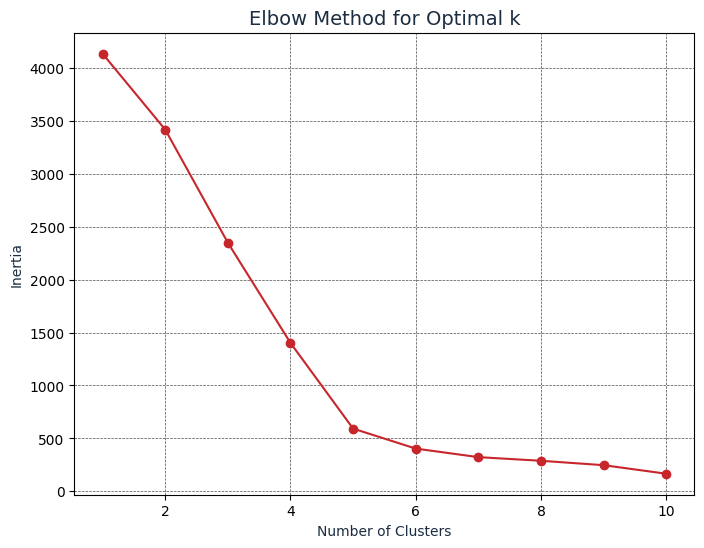

C:\Users\sarad\AppData\Local\Temp\ipykernel_14292\3756159631.py:55: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(


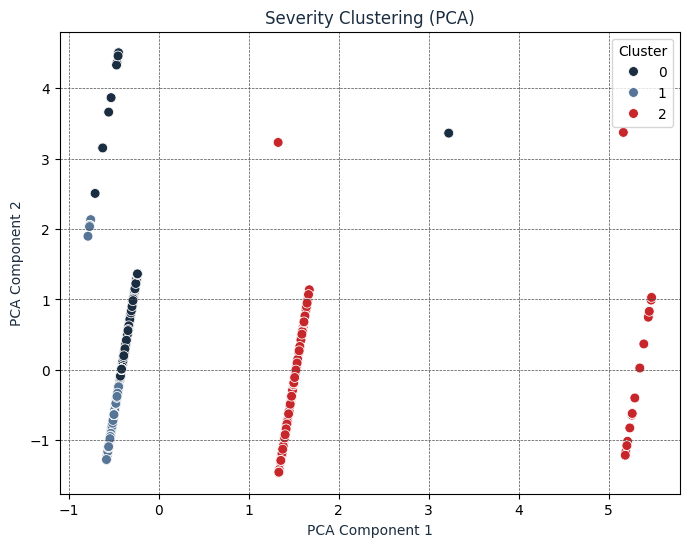

In [97]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Denexus colors and palette
denexus_colors = ['#1B2D40', '#577596', '#C7262B', '#F85C37', '#FF8250', '#4A4A4A']
denexus_palette = sns.color_palette(denexus_colors)

# Select numerical features for clustering
features = ['estimated_cost', 'IT', 'OT', 'Privacy']
df_cluster = df[features].dropna()

# Encode non-numerical features
for feature in features:
    if df_cluster[feature].dtype == 'object':
        le = LabelEncoder()
        df_cluster[feature] = le.fit_transform(df_cluster[feature])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Determine optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color=denexus_colors[2])  # Using a Denexus color
plt.title('Elbow Method for Optimal k', fontsize=14, color=denexus_colors[0])
plt.xlabel('Number of Clusters', color=denexus_colors[0])
plt.ylabel('Inertia', color=denexus_colors[0])
plt.grid(color=denexus_colors[5], linestyle='--', linewidth=0.5)
plt.show()

# Apply K-Means with optimal k (e.g., k=3)
optimal_k = 3  # Adjust based on the Elbow Curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
df_cluster['Cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Scatter plot with Denexus colors
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_data[:, 0], 
    y=reduced_data[:, 1], 
    hue=df_cluster['Cluster'], 
    palette=denexus_palette, 
    s=50, 
    legend='full'
)
plt.title('Severity Clustering (PCA)', color=denexus_colors[0])
plt.xlabel('PCA Component 1', color=denexus_colors[0])
plt.ylabel('PCA Component 2', color=denexus_colors[0])
plt.legend(title='Cluster', loc='best')
plt.grid(color=denexus_colors[5], linestyle='--', linewidth=0.5)
plt.show()



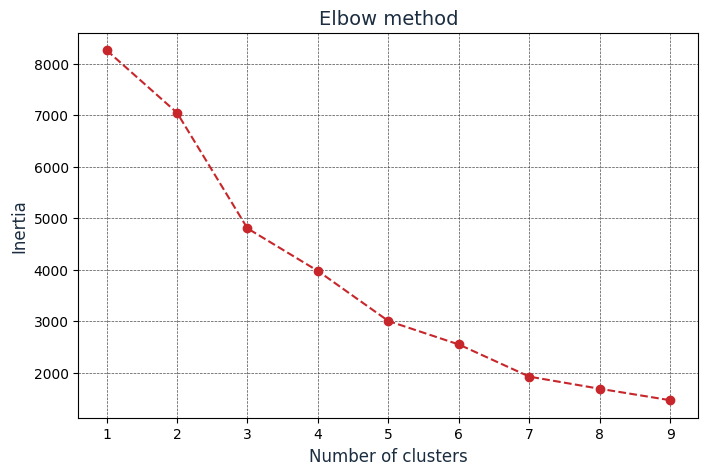

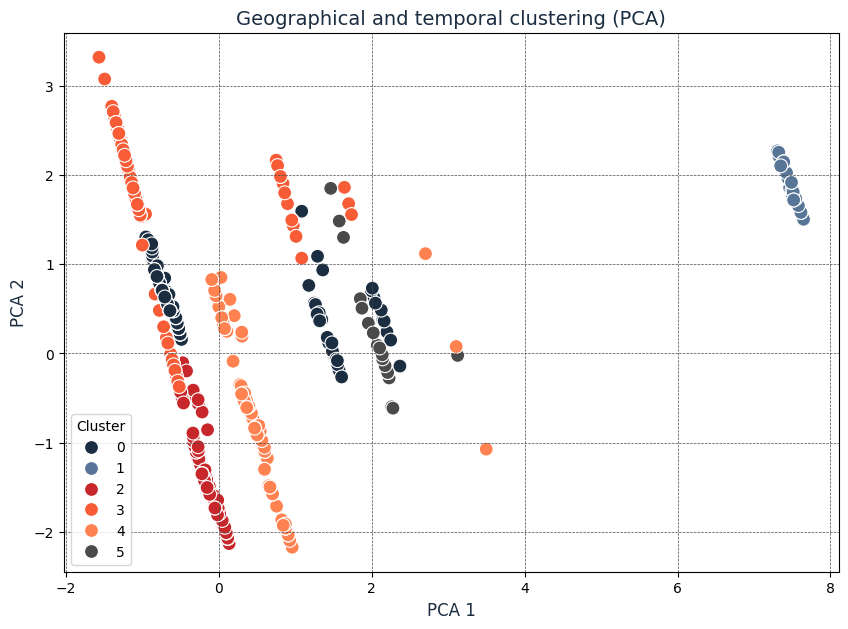

Centroids:
          year     month        Africa  North America  South America  \
0  2021.758621  6.477454  2.917772e-02       0.901857   6.938894e-17   
1  2020.433333  6.400000  1.000000e+00       1.000000   1.000000e+00   
2  2021.839041  5.804795  4.857226e-17       0.037671   9.714451e-17   
3  2005.118012  1.068323  1.863354e-02       0.708075  -6.938894e-18   
4  2020.552632  5.473684  1.973684e-02       0.032895  -2.081668e-17   
5  2019.761905  6.761905  0.000000e+00       0.047619   1.000000e+00   

           Asia        Europe     Australia  
0 -5.551115e-17  1.665335e-16  7.692308e-02  
1  1.000000e+00  1.000000e+00  1.000000e+00  
2 -1.665335e-16  1.000000e+00 -5.551115e-17  
3  1.665335e-16  1.925466e-01  8.074534e-02  
4  1.000000e+00  1.513158e-01 -2.775558e-17  
5  4.761905e-02  1.428571e-01  1.387779e-17  

Count of incidents per cluster:
   Cluster  Count
0        0    377
1        2    292
2        3    161
3        4    152
4        1     30
5        5     21


In [114]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Define Denexus colors and palette
denexus_colors = ['#1B2D40', '#577596', '#C7262B', '#F85C37', '#FF8250', '#4A4A4A']
denexus_palette = sns.color_palette(denexus_colors)

# Selección de las columnas para clustering
features = ['year', 'month', 'Africa', 'North America', 'South America', 'Asia', 'Europe', 'Australia']
df_geo_clustering = df[features].dropna()

# Escalado de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_geo_clustering)

# Determinar el número óptimo de clusters con el método del codo
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Visualización del método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--', color=denexus_colors[2])
plt.title('Elbow method', color=denexus_colors[0], fontsize=14)
plt.xlabel('Number of clusters', color=denexus_colors[0], fontsize=12)
plt.ylabel('Inertia', color=denexus_colors[0], fontsize=12)
plt.grid(color=denexus_colors[5], linestyle='--', linewidth=0.5)
plt.show()

# Aplicar K-Means con el número óptimo de clusters (ajustar K según el gráfico del codo)
optimal_k = 6  # Cambia según el resultado del gráfico
kmeans_geo = KMeans(n_clusters=optimal_k, random_state=42)
df_geo_clustering['Cluster'] = kmeans_geo.fit_predict(scaled_data)

# Visualizar clusters con PCA
pca = PCA(n_components=2)
reduced_geo = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=reduced_geo[:, 0],
    y=reduced_geo[:, 1],
    hue=df_geo_clustering['Cluster'],
    palette=denexus_palette,
    s=100
)
plt.title('Geographical and temporal clustering (PCA)', fontsize=14, color=denexus_colors[0])
plt.xlabel('PCA 1', fontsize=12, color=denexus_colors[0])
plt.ylabel('PCA 2', fontsize=12, color=denexus_colors[0])
plt.legend(title='Cluster')
plt.grid(color=denexus_colors[5], linestyle='--', linewidth=0.5)
plt.show()

# Mostrar los centroides en el espacio de características originales
centroids = scaler.inverse_transform(kmeans_geo.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features)

print("Centroids:")
print(centroids_df)

# Análisis adicional: Conteo de puntos por cluster
cluster_counts = df_geo_clustering['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']
print("\nCount of incidents per cluster:")
print(cluster_counts)


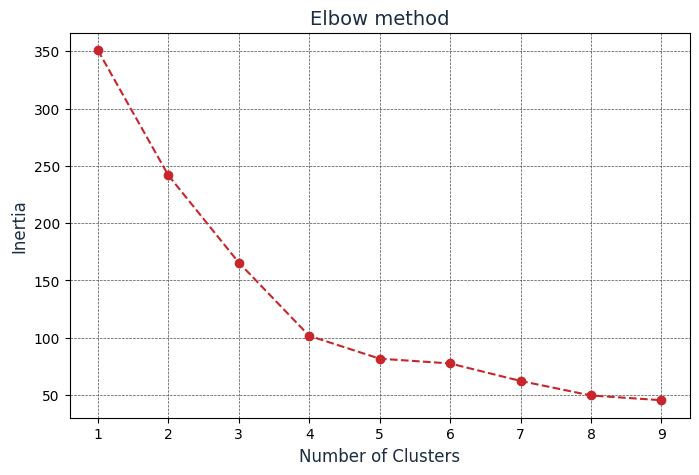

C:\Users\sarad\AppData\Local\Temp\ipykernel_14292\1866843723.py:49: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.scatterplot(


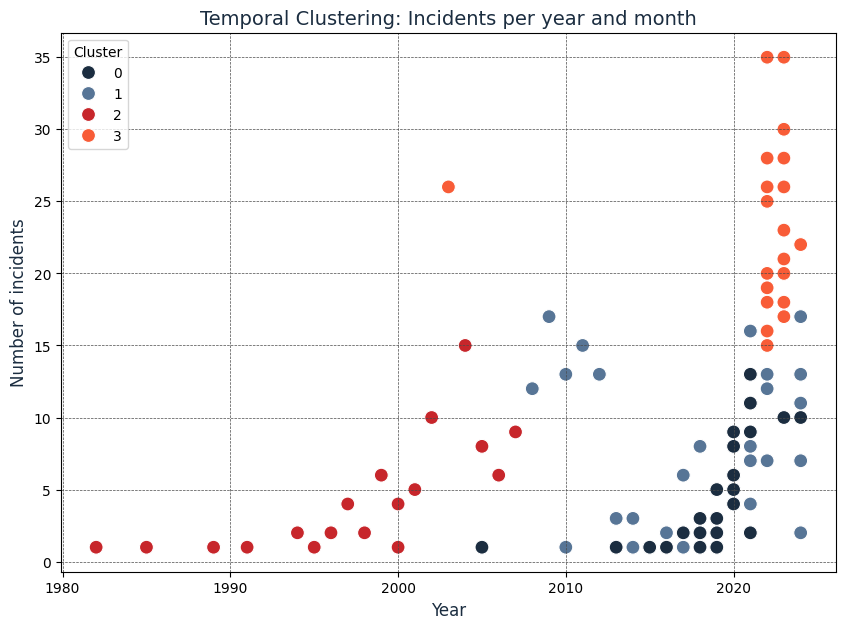

In [111]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Denexus colors and palette
denexus_colors = ['#1B2D40', '#577596', '#C7262B', '#F85C37', '#FF8250', '#4A4A4A']
denexus_palette = sns.color_palette(denexus_colors)

# Paso 1: Crear un DataFrame con número de incidentes por mes y año
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')
df['year_month'] = df['date'].dt.to_period('M')  # Agrupación por año-mes

# Contar el número de incidentes por año y mes
incidents_per_month = df.groupby(['year', 'month']).size().reset_index(name='num_incidents')

# Paso 2: Selección de columnas para clustering
clustering_data = incidents_per_month[['year', 'month', 'num_incidents']]

# Paso 3: Escalar los datos
scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(clustering_data)

# Paso 4: Determinar el número óptimo de clusters usando el método del codo
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_clustering_data)
    inertia.append(kmeans.inertia_)

# Visualización del método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--', color=denexus_colors[2])
plt.title('Elbow method', fontsize=14, color=denexus_colors[0])
plt.xlabel('Number of Clusters', fontsize=12, color=denexus_colors[0])
plt.ylabel('Inertia', fontsize=12, color=denexus_colors[0])
plt.grid(color=denexus_colors[5], linestyle='--', linewidth=0.5)
plt.show()

# Paso 5: Aplicar K-Means con el número óptimo de clusters
optimal_k = 4  # Ajustar según el gráfico del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_clustering_data)

# Paso 6: Visualización de los Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=clustering_data['year'],
    y=clustering_data['num_incidents'],
    hue=clustering_data['Cluster'],
    palette=denexus_palette,
    s=100
)
plt.title('Temporal Clustering: Incidents per year and month', fontsize=14, color=denexus_colors[0])
plt.xlabel('Year', fontsize=12, color=denexus_colors[0])
plt.ylabel('Number of incidents', fontsize=12, color=denexus_colors[0])
plt.legend(title='Cluster')
plt.grid(color=denexus_colors[5], linestyle='--', linewidth=0.5)
plt.show()


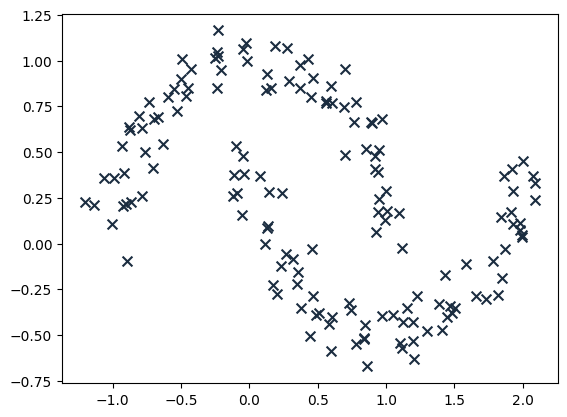

In [112]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

NumSamples=150

# Creates a gaussian distribution of data
X, y = make_blobs(
      n_samples=NumSamples,       # Number of data
      n_features=2,               # Number of features
      centers=2,                  # Number of clusters
      center_box=(-10.0, 10.0),   # Range of values for each feature
      cluster_std=1.5,            # Standard deviation
      shuffle=True,               # Don't order data by labels
      random_state=None,          # Put a number to get reproducible results
      return_centers=False        # If True, add another output parameter
      )

X,y=make_circles(
      n_samples=NumSamples,      # Number of data
      factor=0.15,               # Scale factor between inner and outer circle [0,1)
      noise=0.1,                 # Standard deviation
      shuffle=True,              # To shuffle the samples
      random_state=None          # Put a number to get reproducible results
      )

X,y=make_moons(
      n_samples=NumSamples,      # Number of data
      noise=0.1,                 # Standard deviation
      shuffle=True,              # To shuffle the samples
      random_state=None          # Put a number to get reproducible results
      )




# Plot the data. Columns 0 and 1 are the two features
plt.scatter(X[:, 0],X[:, 1],c="#1B2D40",marker="x",s=50)
plt.show()


In [107]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[0 1]


C:\Users\sarad\AppData\Local\Temp\ipykernel_14292\4281849218.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1],


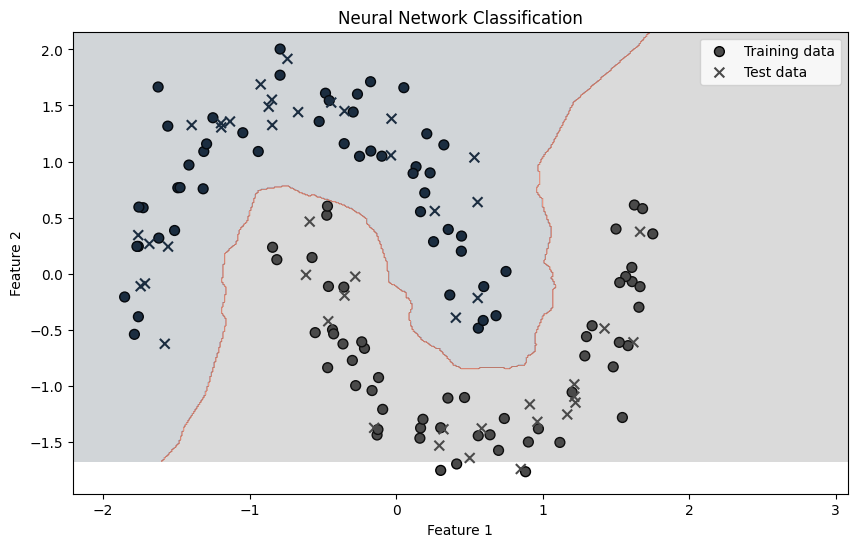

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Define the model
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Predict for test data
y_pred = model.predict(X_test)

# Check the unique values in y_pred to ensure we are using the correct number of colors
print(np.unique(y_pred))  # Check the unique class labels in y_pred

# If the unique classes are more than the colors in the palette, update the palette size
denexus_colors = ['#1B2D40', '#577596', '#C7262B', '#F85C37', '#FF8250', '#4A4A4A']
denexus_cmap = ListedColormap(denexus_colors)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the training data using the custom colormap (DENEXUS PALETTE)
plt.scatter(X_train[:, 0], X_train[:, 1], 
            c=y_train, cmap=denexus_cmap, 
            marker='o', edgecolor='k', s=50, label='Training data')

# Plot the test data using the custom colormap
plt.scatter(X_test[:, 0], X_test[:, 1], 
            c=y_pred, cmap=denexus_cmap, 
            marker='x', edgecolor='k', s=50, label='Test data')

# Generate decision boundary
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))

# Make predictions for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Apply the custom colormap for the decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, cmap=denexus_cmap)

# Add title and labels
plt.title('Neural Network Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
